# Homework 4
### CSE 802
### David Rackerby

6. [Bonus Question: 20 points]The iris (flower) dataset consists of 150 4-dimensional patterns belonging
to three classes (setosa=1, versicolor=2, and virginica=3). There are 50 patterns per class. The 4
features correspond to (a) sepal length in cm, (b) sepal width in cm, (c) petal length in cm, and (d)
petal width in cm. Note that the class labels are indicated at the end of every pattern.
Design a K-NN classifier for this dataset. You can use the Euclidean distance metric for computing
distances. Choose the first 25 patterns of each class for training the classifier (i.e., these are the proto-
types) and the remaining 25 patterns of each class for testing the classifier. [Note: Any ties in the K-NN
classification scheme should be broken at random.]

(a) In order to study the effect of K on the performance of the classifier, report the confusion matrix
for K=1,5,10,15,20,25,30,35,40,45,50.

In [125]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris_df, _ = datasets.load_iris(return_X_y=True, as_frame=True)
setosa = iris_df.iloc[:50]
versicolor = iris_df.iloc[50:100]
virginica = iris_df.iloc[100:]

train = pd.concat([setosa.iloc[:25], versicolor.iloc[:25], virginica.iloc[:25]])
test = pd.concat([setosa.iloc[25:], versicolor.iloc[25:], virginica.iloc[25:]]).reset_index(drop=True)

class_ = [0] * 25 + [1] * 25 + [2] * 25

def classify(k: int, sample: np.ndarray) -> int:
    result = train.apply(func=lambda row: np.linalg.norm(sample - row.values),  axis=1).to_frame(name='dist')
    result['class'] = class_
    results_sorted = result.sort_values(by='dist', axis=0)
    k_neighbors = results_sorted.iloc[:k]
    mode = k_neighbors.mode(axis=0).dropna()
    if len(mode) == 1:
        return int(mode['class'][0])
    else:
        tiebreaker = np.random.randint(len(mode))
        return int(mode['class'][tiebreaker])

def kNN(k: int):
    decisions = [(index // 25, classify(k, row)) for index, row in test.iterrows()]

    confusion = np.zeros((3, 3))
    for decision in decisions:
        confusion[decision[0]][decision[1]] += 1
    return confusion

k_nums = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

error_curve = []
for k in k_nums:
    confusion = kNN(k)
    print(f'Confusion matrix for k = {k}\n{confusion}')
    error_count = 0
    for i in range(len(confusion)):
        for j in range(len(confusion[i])):
            if i != j:
                error_count += confusion[i][j]
    error_rate = error_count / len(class_)
    error_curve.append((k, 1 - error_rate))

Confusion matrix for k = 1
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  3. 22.]]
Confusion matrix for k = 5
[[25.  0.  0.]
 [ 0. 23.  2.]
 [ 0.  4. 21.]]
Confusion matrix for k = 10
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  3. 22.]]
Confusion matrix for k = 15
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  4. 21.]]
Confusion matrix for k = 20
[[25.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  4. 21.]]
Confusion matrix for k = 25
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  4. 21.]]
Confusion matrix for k = 30
[[25.  0.  0.]
 [ 0. 24.  1.]
 [ 0.  6. 19.]]
Confusion matrix for k = 35
[[25.  0.  0.]
 [ 1. 23.  1.]
 [ 0.  6. 19.]]
Confusion matrix for k = 40
[[25.  0.  0.]
 [ 1. 23.  1.]
 [ 0.  8. 17.]]
Confusion matrix for k = 45
[[25.  0.  0.]
 [ 0. 25.  0.]
 [ 0.  7. 18.]]
Confusion matrix for k = 50
[[25.  0.  0.]
 [ 0. 23.  2.]
 [ 0. 17.  8.]]


(b) Plot the classification accuracy as a function of K. Discuss your observations.

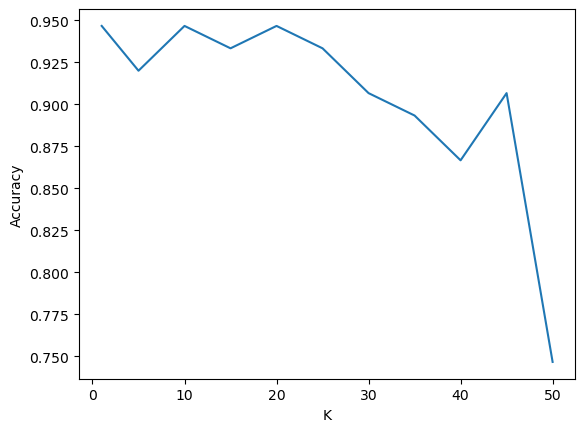

In [135]:
import matplotlib.pyplot as plt

error_curve = np.array(error_curve)
plt.plot(error_curve[:, 0], error_curve[:, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()